In [39]:
from dotenv import dotenv_values

config = dotenv_values(".env")

In [48]:
import requests
import json

In [49]:
#"\"Cattle\" Ireland -is:retweet"
#"\"meat\" -is:retweet"

bearer_token = config["BEARER_TOKEN"]

search_url = "https://api.twitter.com/2/tweets/search/recent" #if you want to change this you can look in the documentation 

#this needs to look like a json object so it looks like a python dictionary 
query_params = {
    'query' : "\"Cattle\" -is:retweet", 
    'max_results' : '100',
    'tweet.fields': 'author_id', 
}

#this is going to set our quest so they know we have authorization and where we are coming from
def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

#This is a http request. This is how we access their API. This is how we send a request to a specific website. 
def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
   
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

# Querying the API
json_response = connect_to_endpoint(search_url, query_params)

# Parsing the response
parsedRes = json.dumps(json_response, indent=4, sort_keys=True, ensure_ascii=True) #ensure_ascii=False so non latin charaters and emojis wont so up
print(parsedRes)

200
{
    "data": [
        {
            "author_id": "845218206750949376",
            "edit_history_tweet_ids": [
                "1609302860231233536"
            ],
            "id": "1609302860231233536",
            "text": "@Tbox97917068 Holistic farming uses traditional farming practices - no chemical fertilizers, not poisoning weeds, no medicating cattle &amp; uses crop rotation.  Google it."
        },
        {
            "author_id": "1608824409405390850",
            "edit_history_tweet_ids": [
                "1609302820108238849"
            ],
            "id": "1609302820108238849",
            "text": "They made up \"privilege\" and \"oppressor\" to con you into feeling guilty, for nothing... this life sucks for most of us, don't let anyone take a moment of joy from you. You are the protagonist of your own tale. Not cattle for the slaughter."
        },
        {
            "author_id": "484233054",
            "edit_history_tweet_ids": [
                "160930279

In [50]:
# similar as above just more detailed
import csv

# Extract the data from the response
data = json_response['data']

# Open a file for writing
with open('tweets.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Create a CSV writer
    writer = csv.writer(csvfile)
    
    # Write the header row
    writer.writerow(['Author ID', 'Tweet ID', 'Tweet Text'])
    
    # Write the data rows
    for tweet in data:
        author_id = tweet['author_id']
        tweet_id = tweet['id']
                         
# Extract the data from the response
data = json_response['data']

# Open a file for writing
with open('tweets.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Create a CSV writer
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Author ID', 'Tweet ID', 'Tweet Text'])

    # Write the data rows
    for tweet in data:
        author_id = tweet['author_id']
        tweet_id = tweet['id']
        if 'text' in tweet:
            tweet_text = tweet['text']
        else:
            tweet_text = ''
        writer.writerow([author_id, tweet_id, tweet_text])

                         

This will add a fourth column to the CSV file, `'Tweet Text'`, and write the tweet text to that column for each tweet if the `'text'` field is present. If the `'text'` field is not present, it will write an empty string to the `'Tweet Text'` column. You can customize the behavior of the `if` statement as needed to handle other cases where the `'text'` field is not present.

In [51]:
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Open the CSV file for reading
with open('tweets.csv', 'r', encoding='utf-8') as csvfile:
    # Create a CSV reader
    reader = csv.reader(csvfile)

    # Skip the header row
    next(reader)

    # Create an empty list to store the tweet data
    data = []
    
    # Iterate through the rows of the CSV file
    for row in reader:
        # Extract the tweet text
        tweet_text = row[2]

        # Use the SentimentIntensityAnalyzer to get the sentiment scores for the tweet
        scores = sia.polarity_scores(tweet_text)

         # Determine the polarity rating based on the compound score
        if scores['compound'] > 0:
            polarity_rating = 'Positive'
        elif scores['compound'] < 0:
            polarity_rating = 'Negative'
        else:
            polarity_rating = 'Neutral'

        # Add the tweet data and polarity rating to the list
        data.append([row[0], row[1], tweet_text, scores['compound'], polarity_rating])

        # Create a dataframe from the list of tweet data
        df = pd.DataFrame(data, columns=['Username', 'Date', 'Tweet', 'Compound Score', 'Polarity Rating'])

        # Select rows where the value in the 'Polarity_Rating' column is 'Positive'
        df_positive = df[df['Polarity Rating'] == 'Positive']

        # Select rows where the value in the 'Polarity_Rating' column is 'Neutral'
        df_neutral = df[df['Polarity Rating'] == 'Neutral']

        # Select rows where the value in the 'Polarity_Rating' column is 'Negative'
        df_negative = df[df['Polarity Rating'] == 'Negative']


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\naomi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
df

,Username,Date,Tweet,Compound Score,Polarity Rating
0,250117661,1609302575161176064,@GregAbbott_TX @TCUFootball A football game is...,0.1761,Positive
1,749486704571146240,1609302374472118272,thats a cattle for dream island!,0.3164,Positive
2,4888231229,1609302314422083585,Cattle Decapitation https://t.co/lSsFUSfjZp,0.0000,Neutral
3,745692624384823297,1609302281144655872,"Zander, what do you think about cattle?\n""Well...",-0.5423,Negative
4,721509270932447232,1609301756131020800,"I can swear too! Just watch me, cattle! F-.......",-0.2677,Negative
...,...,...,...,...,...
95,1489534117507043329,1609288740631089153,@salorwilliam @WildHoney808 That's projection ...,0.7176,Positive
96,1589191113390190592,1609288706007105536,☀☀The security guard is far behind the cattle ...,0.3400,Positive
97,1253586612321214464,1609288692664868866,"@sibindink Sure would love to visit Mat, pleas...",0.8316,Positive
98,1553616753657364480,1609288376875712512,@marhiver @CarnivorousMe1 @MikhailaFuller @jor...,0.4767,Positive


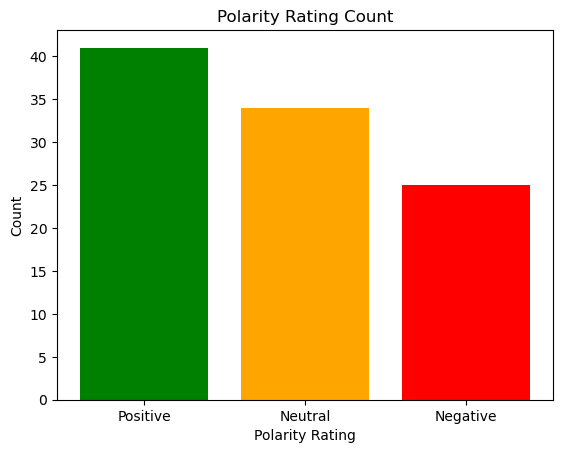

In [29]:
import matplotlib.pyplot as plt

# Initialize lists to store the polarity scores
positive_scores = []
negative_scores = []
neutral_scores = []

# Open the CSV file for reading
with open('tweets.csv', 'r', encoding='utf-8') as csvfile:
    # Create a CSV reader
    reader = csv.reader(csvfile)

    # Skip the header row
    next(reader)

    # Iterate through the rows of the CSV file
    for row in reader:
        # Extract the tweet text
        tweet_text = row[2]

        # Use the SentimentIntensityAnalyzer to get the sentiment scores for the tweet
        scores = sia.polarity_scores(tweet_text)

        # Append the scores to the appropriate list
        if scores['compound'] > 0:
            positive_scores.append(scores['compound'])
        elif scores['compound'] < 0:
            negative_scores.append(scores['compound'])
        else:
            neutral_scores.append(scores['compound'])
            
# Create a bar chart with the polarity scores
plt.bar(['Positive', 'Neutral', 'Negative'], [len(positive_scores), len(neutral_scores), len(negative_scores)], 
        color=['green', 'orange', 'red'])

# Add a title and axis labels
plt.title('Polarity Rating Count')
plt.xlabel('Polarity Rating')
plt.ylabel('Count')

# Show the plot
plt.show()


In [38]:
df

,Author ID,Tweet ID,Tweet Text
0,1058182470,1609297364845469697,"Seam like and sing;Warm lazy words, white catt..."
1,859188710172176384,1609297283069378561,@DaleStarkA10 My dad herded cattle as a young ...
2,1202769032845438976,1609297028596613120,Watching Kolby(16) &amp; Jeremy(14) sizing a p...
3,1127029609898364928,1609297020417880064,@USNavy Have you done anything to exact reveng...
4,22108969,1609296726053224449,@yashar @Leftmright Also not clear if he owns ...
...,...,...,...
95,920592763,1609284295121674243,@terrymap1 Haaaa cattle rustling is so painful...
96,3102995398,1609284009900507137,@MaleehaHashmey We are cattle and the looters ...
97,281065795,1609283993102434304,The photos of working cowboys taken by Erwin S...
98,1104421167832748034,1609283719239548929,"hustle your cattle, Jack, do you understand? O..."


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the data from the CSV file
df = pd.read_csv('tweets.csv')

# Preprocess the data
# (fill missing values, encode categorical variables, etc.)

# Define the input features (X) and the target label (y)
X = df['Tweet Text']
y = df['Polarity Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the testing set
score = model.evaluate(X_test, y_test, batch_size=32)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

KeyError: 'Polarity Rating'

This code reads the tweet_text field from each row of the CSV file, and it uses the SentimentIntensityAnalyzer from nltk to compute the sentiment scores for each tweet. The sentiment scores are returned as a dictionary with four fields: 'neg', 'neu', 'pos', and 'compound'. The 'neg', 'neu', and 'pos' fields represent the negative, neutral, and positive sentiment scores, respectively, while the 'compound' field represents the overall compound sentiment score.

You can use these scores to classify the sentiment of the tweets as positive, negative, or neutral, or you can use them to compute statistics such as the average sentiment score for all tweets.


This code reads the `tweet_text` field from each row of the CSV file, and it uses the `SentimentIntensityAnalyzer` to compute the sentiment scores for the tweet. It then classifies the sentiment of the tweet as positive, negative, or neutral based on the `'compound'` score.

To compute statistics such as the average sentiment score for all tweets, you can keep track of the total sentiment score and the number of tweets, and then compute the average at the end. Here is an example of how you could do this:


In [24]:
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Initialize the total sentiment score and the number of tweets
total_score = 0
num_tweets = 0

# Open the CSV file for reading
with open('tweets.csv', 'r', encoding='utf-8') as csvfile:
    # Create a CSV reader
    reader = csv.reader(csvfile)

    # Skip the header row
    next(reader)

    # Iterate through the rows of the CSV file
    for row in reader:
        # Extract the tweet text
        tweet_text = row[2]

        # Use the SentimentIntensityAnalyzer to get the sentiment scores for the tweet
        scores = sia.polarity_scores(tweet_text)

        # Add the 'compound' score to the total sentiment score
        total_score += scores['compound']

        # Increment the number of tweets
        num_tweets += 1

        # Compute the average sentiment score
        average_score = total_score / num_tweets

        # Print the average sentiment score
        print(f"Average sentiment score: {average_score}")

Average sentiment score: 0.0
Average sentiment score: -0.3866
Average sentiment score: 0.020866666666666662
Average sentiment score: -0.20827500000000002
Average sentiment score: -0.08624000000000001
Average sentiment score: -0.07186666666666668
Average sentiment score: -0.06160000000000001
Average sentiment score: -0.1333125
Average sentiment score: -0.1185
Average sentiment score: -0.10665
Average sentiment score: -0.16146363636363636
Average sentiment score: -0.141575
Average sentiment score: -0.07413846153846154
Average sentiment score: -0.08852142857142857
Average sentiment score: -0.04016
Average sentiment score: -0.03765
Average sentiment score: -0.05150588235294118
Average sentiment score: -0.09151666666666666
Average sentiment score: -0.12372105263157894
Average sentiment score: -0.135595
Average sentiment score: -0.12913809523809525
Average sentiment score: -0.13872272727272728
Average sentiment score: -0.1646521739130435
Average sentiment score: -0.19225416666666664
Average 

This code reads the `tweet_text` field from each row of the CSV file, and it uses the `SentimentIntensityAnalyzer` to compute the sentiment scores for the tweet. It then adds the `'compound'` score to the total sentiment score and increments the number of tweets. At the end, it computes the average sentiment score by dividing the total sentiment score by the number of tweets.

I hope this helps! Let me know if you have any questions.
